<a href="https://colab.research.google.com/github/kenneth-nguyenn/02_ADS_Project/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đồ án: Khoa học Dữ liệu và Ứng dụng

## Thông tin chung:
### Giảng viên: 
- Trần Trung Kiên
- Nguyễn Thái Vũ

### Thông tin nhóm:
1. STT: Nhóm 02
2. Thành viên:

| STT | MSSV | Họ tên | Github |
| --- | --- | --- | --- |
| 1 | 1712727 | Nguyễn Hoàng Sơn | [hsjune29th](https://github.com/hsjune29th) |
| 2 | 1712258 | Nguyễn Văn Hậu | [kenneth-nguyenn](https://github.com/kenneth-nguyenn) |
| 3 | 1712888 | Nguyễn Đình Tuyên | [Tuyen177](https://github.com/Tuyen177) |

3. Phân công công việc:
- [Google Sheet](https://docs.google.com/spreadsheets/d/1eKbhc6rpNsDoBfTC8SfAnlKiw_y3_OvHUefUuxQw8BI/edit#gid=621371829)

## 1. Mô tả bài toán:

- **Tên cuộc thi:** [Google Brain - Ventilator Pressure Prediction](https://www.kaggle.com/competitions/ventilator-pressure-prediction/data?select=test.csv)
- **Mô tả:** Được tổ chức bởi Google Brain vào 04/11/2021 với hơn 2,605 nhóm tham dự.
- **Input:** Tập dữ liệu được thu thập từ máy thở cung cấp khí oxy cho phổi.
- **Output:** Dự đoán áp lực trên đường thở (pressure).
- **Độ đo::**
    + Cuộc thi sẽ được tính điểm là trung bình sai số tuyệt đối giữa áp suất dự đoán và áp suất thực tế trong giai đoạn hít thở của mỗi nhịp thở.
    + Công thức: 
    $|X-Y|$
- **Ý nghĩa thực tiễn của ứng dụng:**
    + Thở máy là một biện pháp chuyên sâu của bác sĩ lâm sàng, dưới sự khẩn thiết của đại dịch COVID-19 trên diện rộng đã chỉ ra điểm hạn chế của việc sử sụng phương pháp thở máy này. Việc phát triển các phương pháp mới để điều khiển máy thở cơ học rất tốn kém, gặp khó khăn khi thử nghiệm lâm sàng.
    + Bài toán này cũng là tiền đề cho các thuật toán thích ứng với bệnh nhân, giúp giảm bớt gánh nặng cho bác sĩ lâm sàng trong tình hình mới. Do đó, các phương pháp điều trị bằng máy thở có thể được phổ biến rộng rãi hơn để giúp bệnh nhân thở được.

## 2. Giải pháp của bài toán:

### 2.1. Ý tưởng:

- Nhóm quyết định tìm hiểu và cài đặt giải pháp **"[The inverse of a PID controller](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/285283)"**, giải pháp đứng vị thứ hai trong leaderboard.
- Qúa trình hoàn thành cuộc thi, nhóm tác giả thực hiện ba giai đoạn chính:
    + Sử dụng 7 model được share từ @dlaststark ([notebook](https://www.kaggle.com/code/dlaststark/gb-vpp-pulp-fiction/notebook)). Trong notebook này, tác giả trên tập trung vào `Feature Engineering` và xây dựng `
Keras DNN Model` trên TPU.
    + Tiếp theo, tác gỉa tập hợp các dự đoán của 7 model trên bằng cách kết hợp diểm mạnh của giá trị median và mean [tại đây](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/282735).
    + Cuối cùng, tác giả cố gắng xác định hàm nghịch đảo của PID controller (tìm nghịch đảo của bộ điều khiển P và sau đó chuyển sang bộ điều khiển PI) để dự đoán áp suất, được thảo luận [tại đây](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/285283).

### 2.2. Lý do lựa chọn:

- Giải pháp đứng vị thứ hai, nằm trong trong TOP-10 leaderboard.
- Hầu hết, các giải pháp đứng trong TOP đầu của leaderboard đều sử dụng đến **PID controller** để giải quyết bài toán này. Mặt khác, trong quá trình đọc phần notebook cũng như giải thích của tác giả, nhóm em cảm thấy dễ hiểu và nắm được cơ bản quá trình xử lý trong notebook.

### 2.3. Phương pháp thu thập dữ liệu:

- Dữ liệu được sử dụng trong cuộc thi này được tạo ra bằng cách sử dụng một máy thở đã kết nối với phổi kiểm tra ống thổi nhân tạo thông qua một mạch hô hấp.
- Sơ đồ cách thiết lập như sau: 
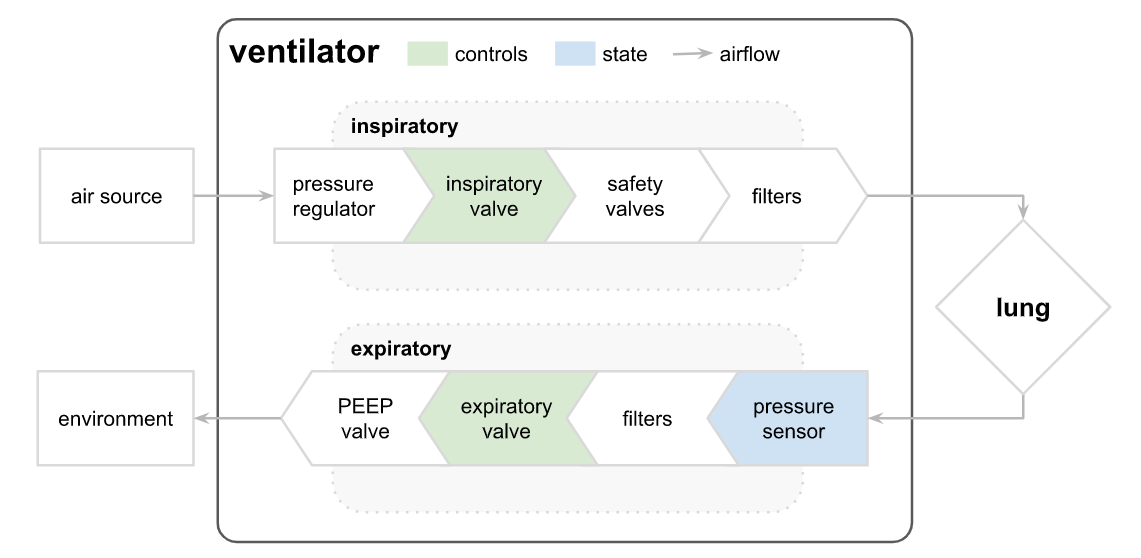

Hai đầu vào điều khiển được đánh dấu màu xanh lá cây: 
- Inspiratory valve : biến liên tục [0:100] đại diện cho tỷ lệ phần trăm van điện tử của máy thở được mở để cho không khí vào phổi.
- Expiratory valve: biến nhị phân (0,1) đại diện cho van thăm dò đang  (1) hoặc đóng (0) để thoát khí ra ngoài.

Trong cuộc thi này, những người tham gia được cung cấp nhiều chuỗi thời gian thở và sẽ học cách dự đoán áp lực đường thở trong mạch hô hấp trong quá trình thở dựa trên chuỗi thời gian của đầu vào kiểm soát.

Mỗi chuỗi thời gian đại diện cho một nhịp thở khoảng 3 giây. Các tệp được sắp xếp sao cho mỗi hàng là một bước thời gian trong hơi thở và đưa ra hai tín hiệu điều khiển, kết quả là áp lực đường thở và các thuộc tính liên quan của phổi.

### 2.4. Mô tả về các cột dữ liệu:

- `id`: mã định danh của 1 bước thở trên toàn bộ tệp.
- `breath_id`: mã định danh của 1 nhịp thở trên toàn bộ tệp.
- `R`: thuộc tính phổi cho biết mức độ hạn chế của đường thở.
- `C`: thuộc tính phổi cho biết mức độ tuân thủ của phổi.
- `time_step`: dấu thời gian thực tế.
- `u_in`: đầu vào điều khiển cho van điện tử [0:100].
- `u_out`: đầu vào điều khiển cho van thăm dò (0,1).
- `pressure`: áp lực đường thở đo trong mạch hô hấp.

## 3. Giải quyết bài toán:

### Import libraries:

In [1]:
import numpy as np
import pandas as pd

In [ ]:
import gc

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Concatenate, LSTM, GRU
from tensorflow.keras.layers import Bidirectional, Multiply

np.random.seed(42)
tf.random.set_seed(42)

### 3.1. Đọc dữ liệu:

In [ ]:
# train.csv
!gdown https://drive.google.com/u/1/uc?id=14PVjC4WigAqnUuNis3tyeuEtaQltN6e-&export=download&confirm=t 
# test.csv
!gdown https://drive.google.com/u/1/uc?id=1bn1ugqDU_fqs1O7av-OAJ7BjbJWj2UIj&export=download&confirm=t

In [2]:
train_df = pd.read_csv('/content/train.csv')
print(f"train_df: {train_df.shape}")
train_df.head()

train_df: (60880, 8)


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0.0,5.837492
1,2,1,20,50,0.033652,18.383041,0.0,5.907794
2,3,1,20,50,0.067514,22.509278,0.0,7.876254
3,4,1,20,50,0.101542,22.808822,0.0,11.742872
4,5,1,20,50,0.135756,25.355850,0.0,12.234987


In [3]:
test_df = pd.read_csv('/content/test.csv')
print(f"test_df: {test_df.shape}")
test_df.head()

test_df: (102114, 7)


,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0.0
1,2,0,5,20,0.031904,7.515046,0.0
2,3,0,5,20,0.063827,14.651675,0.0
3,4,0,5,20,0.095751,21.230610,0.0
4,5,0,5,20,0.127644,26.320956,0.0


### 3.1.1. Khám phá dữ liệu:

In [ ]:
# Các giá trị khác nhau của C
C_values = train_df.groupby(['breath_id'])['C'].unique()
np.unique(C_values)

array([array([10]), array([20]), array([50])], dtype=object)

In [ ]:
# Các giá trị khác nhau của R
R_values = train_df.groupby(['breath_id'])['R'].unique()
np.unique(R_values)

array([array([5]), array([20]), array([50])], dtype=object)

In [ ]:
small_df = train_df.loc[0:799,]
small_df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
795,796,12,50,20,2.396570,4.945038,1,6.540513
796,797,12,50,20,2.428568,4.953164,1,6.821722
797,798,12,50,20,2.460553,4.960086,1,6.610815
798,799,12,50,20,2.492467,4.965973,1,6.821722


In [ ]:
breath_1 = small_df.groupby(['breath_id'])[['time_step', 'R', 'C', 'u_in', 'u_out', 'pressure']].get_group(1)
breath_1

,time_step,R,C,u_in,u_out,pressure
0,0.000000,20,50,0.083334,0,5.837492
1,0.033652,20,50,18.383041,0,5.907794
2,0.067514,20,50,22.509278,0,7.876254
3,0.101542,20,50,22.808822,0,11.742872
4,0.135756,20,50,25.355850,0,12.234987
...,...,...,...,...,...,...
75,2.553593,20,50,4.974474,1,6.399909
76,2.587754,20,50,4.978481,1,6.610815
77,2.621773,20,50,4.981847,1,6.329607
78,2.655746,20,50,4.984683,1,6.540513


In [ ]:
breath_1['C-R'] = abs(breath_1['C'] - breath_1['R'])
breath_1.head()

,time_step,R,C,u_in,u_out,pressure,C-R
0,0.000000,20,50,0.083334,0,5.837492,30
1,0.033652,20,50,18.383041,0,5.907794,30
2,0.067514,20,50,22.509278,0,7.876254,30
3,0.101542,20,50,22.808822,0,11.742872,30
4,0.135756,20,50,25.355850,0,12.234987,30


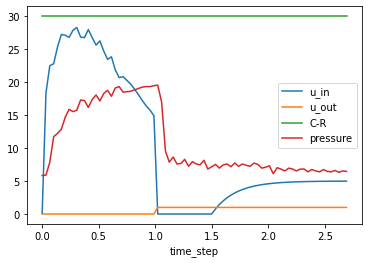

In [ ]:
breath_1.plot.line(x='time_step', y=['u_in', 'u_out', 'C-R', 'pressure']);

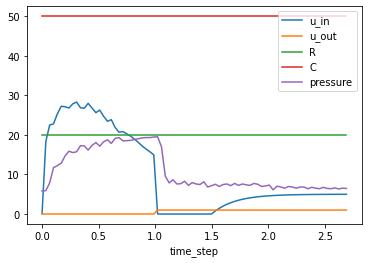

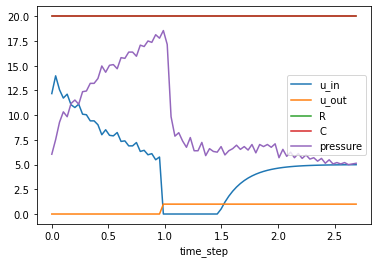

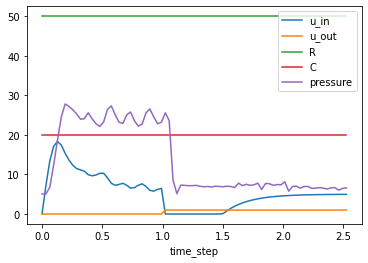

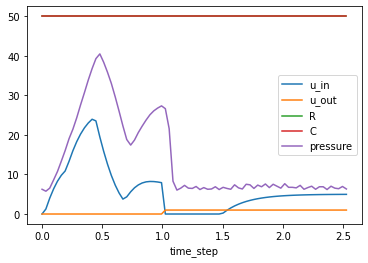

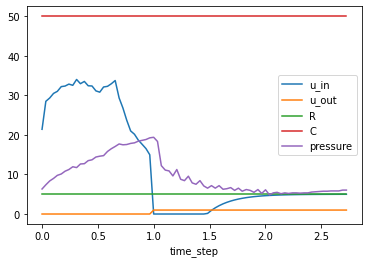

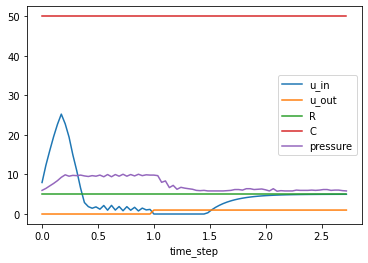

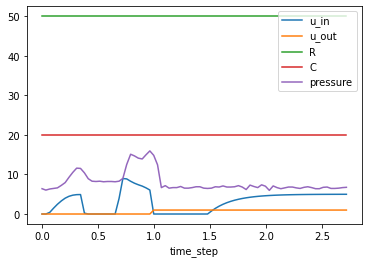

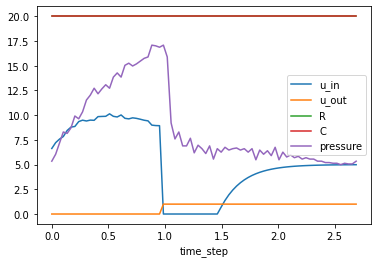

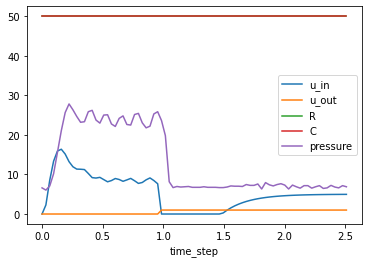

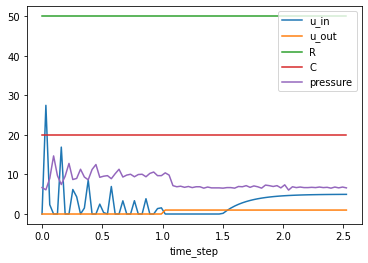

In [ ]:
small_breath = small_df.groupby(['breath_id'])[['time_step', 'R', 'C', 'u_in', 'u_out', 'pressure']]
for i in small_breath.groups:
  temp_df = small_breath.get_group(i).copy()
  sub = abs(temp_df.loc[:, 'C'] - temp_df.loc[:, 'R'])
  temp_df.loc[0:, 'C-R'] = sub
  temp_df.plot.line(x='time_step', y=['u_in', 'u_out', 'R', 'C', 'pressure'])

In [ ]:
# Nếu u_out bằng 0 thì sao?


### 3.2. Feature Engineer:

Quá trình Feature Engineer chia làm 8 bước được mô tả chi tiết như bên dưới. Sau quá trình phân tích, tất cả các quá trình được thực hiện trong một hàm duy nhất là `add_features` với input là một dataframe với 7 features và ouput là một dataframe có 71 features.

Quá trình chia làm 8 bước:

#### 3.2.1. Các feature vật lý (tích, tổng):

In [ ]:
# Tính tích chéo của u_in và u_out
df['cross']= df['u_in'] * df['u_out']
# Tính tích chéo của time_step và u_out
df['cross2']= df['time_step'] * df['u_out']

In [ ]:
# Tính tổng tích lũy của mỗi phổi lượng khí u_in nhân với khoảng thời gian time_step
# df['area'] = df['time_step'] * df['u_in']
# df['area'] = df.groupby('breath_id')['area'].cumsum()

Tính tổng tích lũy thời gian

Trong [thảo luận](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/273974), người đề xuất **@Carl McBrife Ellis** cho rằng nó cải thiện điểm đáng kể. Phía sau điều này là áp suất trong phổi tỉ lệ với lượng không khí thực sự được bơm vào phổi. Rõ ràng, tính năng này không hữu ích khi thở ra, nhưng vì giai đoạn thở ra không được tính điểm, mọi thứ vẫn ổn. Trên thực tế, nó mang ý nghĩa thể hiện tốc độ thay đổi của áp suất được điều chỉnh bởi độ mở van (u_in). Áp suất sẽ tương quan với tích phân của việc mở van.

In [ ]:
# # Tính tổng tích lũy lượng khí u_in của mỗi phổi
# df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()

Tương tự với `time_step`:

In [ ]:
# # Tính tổng tích lũy khoảng thời gian của mỗi phổi
# df['time_step_cumsum'] = df.groupby(['breath_id'])['time_step'].cumsum()

#### 3.2.2. Lag Feature:

Lag feature là các giá trị mục tiêu từ các khoảng thời gian trước đó. Cụ thể, lag có thể hiểu là độ trễ về mặt thời gian. Ở lag_1, người ta sẽ thay thế giá trị tại thời gian t bằng giá trị tại thời gian trước đó là t-1. Tương tự với lag_2, lag_3, lag_4. Với lag_back, thay cho t-1 là t+1. Mặc định các giá trị đầu và giá trị cuối bị thiếu được mặc định là Nan. Kĩ thuật này thường được sử dụng trong dự báo chuỗi thời gian (time-series). 

In [ ]:
# Tạo các feature với độ trễ bằng 1 đơn vị thời gian
df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)

In [ ]:
# Tương tự với độ trê  2, 3, 4 đơn vị thời gian
# df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
# df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
# df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
# df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)

# df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
# df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
# df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
# df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)

# df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
# df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
# df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)
# df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)

Cuối cùng, thay thế các giá trị Nan bằng số 0

In [ ]:
# df = df.fillna(0)

#### 3.2.3. Max mean của u_in trong từng phổi:

Max value of u_in and u_out for each breath

In [ ]:
# Lượng khi lớn nhất ứng với mỗi phổi.
# df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')

In [ ]:
# Lượng khi trung bình ứng với mỗi phổi.
# df['breath_id__u_in__mean'] = df.groupby(['breath_id'])['u_in'].transform('mean')

Difference between the current value of u_in and the max value within the breath

In [ ]:
# Khoảng cách giữa u_in và lượng khí lớn nhất của mỗi phổi
# df['breath_id__u_in__diffmax'] = df.groupby(
#     ['breath_id'])['u_in'].transform('max') - df['u_in']

In [ ]:
# Khoảng cách giữa u_in và lượng khí trung bình của mỗi phổi
# df['breath_id__u_in__diffmean'] = df.groupby(
#     ['breath_id'])['u_in'].transform('mean') - df['u_in']

#### 3.2.4. Some feature step 4:

Mô tả về ý tưởng, tiếp theo sau là quá trình thực hiện. (Diễn giải để bất kì ai cũng có thể hiểu được)

#### 3.2.5. Some feature step 5:

Mô tả về ý tưởng, tiếp theo sau là quá trình thực hiện. (Diễn giải để bất kì ai cũng có thể hiểu được)

#### 3.2.6. Some feature step 6:

Mô tả về ý tưởng, tiếp theo sau là quá trình thực hiện. (Diễn giải để bất kì ai cũng có thể hiểu được)

#### 3.2.7. Different Feature:

- Các feature này mô tả về sự chênh lệch giữa các u_in, u_out hiện tại với 1, 2 lần đo sau đó (lag_back1, lag_back2).

In [ ]:
df_example = train_df.loc[:79].copy()
df_example['u_in_lag_back1'] = df_example.groupby('breath_id')['u_in'].shift(-1)
df_example['u_out_lag_back1'] = df_example.groupby('breath_id')['u_out'].shift(-1)
df_example['u_in_lag_back2'] = df_example.groupby('breath_id')['u_in'].shift(-2)
df_example['u_out_lag_back2'] = df_example.groupby('breath_id')['u_out'].shift(-2)

In [ ]:
df_example['u_in_lagback_diff1'] = df_example['u_in'] - df_example['u_in_lag_back1']
df_example['u_out_lagback_diff1'] = df_example['u_out'] - df_example['u_out_lag_back1']
df_example['u_in_lagback_diff2'] = df_example['u_in'] - df_example['u_in_lag_back2']
df_example['u_out_lagback_diff2'] = df_example['u_out'] - df_example['u_out_lag_back2']

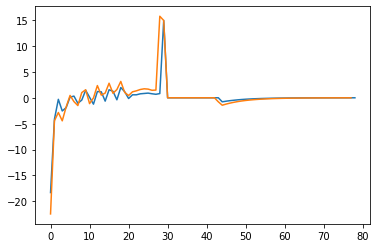

In [ ]:
df_example['u_in_lagback_diff1'].plot()
df_example['u_in_lagback_diff2'].plot()

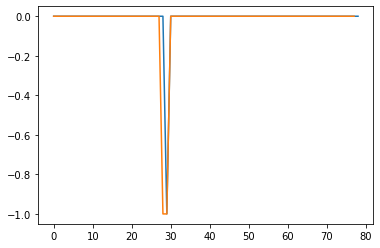

In [ ]:
df_example['u_out_lagback_diff1'].plot()
df_example['u_out_lagback_diff2'].plot()

#### 3.2.8. R - C Feature:

- R, C là các thuộc tính về phổi, có các giá trị như:
  - R: 5, 20, 50
  - C: 10, 20, 50
- Tác giả kết hợp R, C và sử dụng như một biến phân loại để cho vào mô hình train.

In [ ]:
df_example['R'] = df_example['R'].astype(str)
df_example['C'] = df_example['C'].astype(str)
df_example['R__C'] = df_example["R"] + '__' + df_example["C"]
df_example = pd.get_dummies(df_example)

#### 3.2.9. Tổng hợp tất cả các feature:

So với [notebook Baseline](https://www.kaggle.com/mst8823/google-brain-lightgbm-baseline) và hầu hết các notebook khác, các feature đặc trưng chỉ có tác giả thực hiện như: 
- Trong step 2: **`u_in_lag4, u_in_lag_back4, u_out_lag4, u_out_lag_back4`**
- Trong step 3: **`u_in_diff3, u_out_diff3, u_in_diff4, u_out_diff4`**
- Trong step 5: **`breath_id__u_in_lag, breath_id__u_in_lag2, u_in_lagback_diff1, u_out_lagback_diff1, u_in_lagback_diff2, u_out_lagback_diff2`**
- Trong step 6: **`time_step_diff, ewm_u_in_mean, 15_in_sum, 15_in_min, 15_in_max, 15_in_mean`**

In [4]:
def add_features(df):
    
    # Step 1:
    # Tính tích chéo của u_in và u_out
    df['cross']= df['u_in'] * df['u_out']
    # Tính tích chéo của time_step và u_out
    df['cross2']= df['time_step'] * df['u_out']
    # Tính tổng tích lũy của mỗi phổi lượng khí u_in nhân với khoảng thời gian time_step
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    # Tính tổng tích lũy khoảng thời gian của mỗi phổi
    df['time_step_cumsum'] = df.groupby(['breath_id'])['time_step'].cumsum()
    # Tính tổng tích lũy lượng khí u_in của mỗi phổi
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    print("Step-1...Completed")
    
    # Step 2:
    # Ý tưởng phần này là dịch chuyển u_in và u_out tăng/giảm theo từng phổi.
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
    df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
    df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
    df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
    df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)
    df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
    df = df.fillna(0)
    print("Step-2...Completed")
    
    # step 3:
    # Lượng khi lớn nhất ứng với mỗi phổi.
    df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    # Lượng khi trung bình ứng với mỗi phổi.
    df['breath_id__u_in__mean'] = df.groupby(['breath_id'])['u_in'].transform('mean')
    # Khoảng cách giữa u_in và lượng khí lớn nhất của mỗi phổi
    df['breath_id__u_in__diffmax'] = df.groupby(
        ['breath_id'])['u_in'].transform('max') - df['u_in']
    # Khoảng cách giữa u_in và lượng khí trung bình của mỗi phổi
    df['breath_id__u_in__diffmean'] = df.groupby(
        ['breath_id'])['u_in'].transform('mean') - df['u_in']
    print("Step-3...Completed")
    
    # Step 4:
    # sự thay đổi u_in so với 1 lần đo trước đó
    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    # sự thay đổi u_out so với 1 lần đo trước đó
    df['u_out_diff1'] = df['u_out'] - df['u_out_lag1']
    # sự thay đổi u_in so với 2 lần đo trước đó
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    # sự thay đổi u_out  so với 2 lần đo trước đó
    df['u_out_diff2'] = df['u_out'] - df['u_out_lag2']
    # sự thay đổi u_in so với 3 lần đo trước đó
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    # sự thay đổi u_out so với 3 lần đo trước đó
    df['u_out_diff3'] = df['u_out'] - df['u_out_lag3']
    # sự thay đổi u_in so với 4 lần đo trước đó
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    # sự thay đổi u_out so với 4 lần đo trước đó
    df['u_out_diff4'] = df['u_out'] - df['u_out_lag4']
    print("Step-4...Completed")
    
    # Step 5:
    # giá trị trung bình của u_in từ lần đo đầu tiên cho đến hiện tại
    df['one'] = 1
    df['count'] = (df['one']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] =df['u_in_cumsum'] /df['count']
    df['breath_id_lag']=df['breath_id'].shift(1).fillna(0)
    df['breath_id_lag2']=df['breath_id'].shift(2).fillna(0)
    # breath_id hiện tại có là breath_id của lần đo trước đó?
    df['breath_id_lagsame']=np.select([df['breath_id_lag']==df['breath_id']],[1],0)
    # breath_id hiện tại có là breath_id của 2 lần đo trước đó?
    df['breath_id_lag2same']=np.select([df['breath_id_lag2']==df['breath_id']],[1],0)
    df['breath_id__u_in_lag'] = df['u_in'].shift(1).fillna(0)
    # nếu breath_id trùng với lần đo trước, tạo cột có giá trị bằng u_in trước đó
    df['breath_id__u_in_lag'] = df['breath_id__u_in_lag'] * df['breath_id_lagsame']
    df['breath_id__u_in_lag2'] = df['u_in'].shift(2).fillna(0)
    # nếu breath_id trùng với 2 lần đo trước, tạo cột có giá trị bằng u_in 2 lần đo trước đó
    df['breath_id__u_in_lag2'] = df['breath_id__u_in_lag2'] * df['breath_id_lag2same']
    print("Step-5...Completed")
    
    # Step 6:
    # sự thay đổi time_step so với lần đo trước
    df['time_step_diff'] = df.groupby('breath_id')['time_step'].diff().fillna(0)
    # tính trung bình cộng có trong số của u_in
    df['ewm_u_in_mean'] = (df\
                           .groupby('breath_id')['u_in']\
                           .ewm(halflife=9)\
                           .mean()\
                           .reset_index(level=0,drop=True))
    # thêm các cột: sum, min, max, mean là tổng , GTNN, GTLN, TB từ lần đo đầu tiên đến lần đó đang xét
    df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (df\
                                                              .groupby('breath_id')['u_in']\
                                                              .rolling(window=15,min_periods=1)\
                                                              .agg({"15_in_sum":"sum",
                                                                    "15_in_min":"min",
                                                                    "15_in_max":"max",
                                                                    "15_in_mean":"mean"})\
                                                               .reset_index(level=0,drop=True))
    print("Step-6...Completed")
    
    # Step 07:
    #sự thay đổi của u_in so với 1 lần đo _lag trước đó
    df['u_in_lagback_diff1'] = df['u_in'] - df['u_in_lag_back1']
    #sự thay đổi của u_out so với 1 lần đo _lag trước đó
    df['u_out_lagback_diff1'] = df['u_out'] - df['u_out_lag_back1']
    #sự thay đổi của u_in so với 2 lần đo _lag trước đó
    df['u_in_lagback_diff2'] = df['u_in'] - df['u_in_lag_back2']
    #sự thay đổi của u_out so với 2 lần đo _lag trước đó
    df['u_out_lagback_diff2'] = df['u_out'] - df['u_out_lag_back2']
    print("Step-7...Completed")
    
    # Step 08:
    #chuyển đổi cột 'R', 'C' sang kiểu string
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    #nối 2 cột 'R', 'C' lại với nhau
    df['R__C'] = df["R"].astype(str) + '__' + df["C"].astype(str) 
    #chuyển đổi các cột có biến chuỗi thành biến chỉ số/giả (tương tự OHE)
    df = pd.get_dummies(df)
    print("Step-8...Completed")
    
    return df

Train data...

Step-1...Completed
Step-2...Completed
Step-3...Completed
Step-4...Completed
Step-5...Completed
Step-6...Completed
Step-7...Completed
Step-8...Completed

Test data...

Step-1...Completed
Step-2...Completed
Step-3...Completed
Step-4...Completed
Step-5...Completed
Step-6...Completed
Step-7...Completed
Step-8...Completed


Thực thi trên tập training:

In [ ]:
print("Train data...\n")
train = add_features(train_df)

del train_df
gc.collect()

Thực thi trên tập test:

In [ ]:
print("\nTest data...\n")
test = add_features(test_df)

del test_df
gc.collect()


**Tại sao phải drop các cột này?**

Drop các cột **`'pressure','id', 'breath_id', 'one','count', 'breath_id_lag', 'breath_id_lag2', 'breath_id_lagsame', 'breath_id_lag2same'`**

In [5]:
targets = train[['pressure']].to_numpy().reshape(-1, 80)

train.drop(['pressure','id', 'breath_id','one','count',
            'breath_id_lag','breath_id_lag2','breath_id_lagsame',
            'breath_id_lag2same'], axis=1, inplace=True)

test = test.drop(['id', 'breath_id','one','count','breath_id_lag',
                  'breath_id_lag2','breath_id_lagsame',
                  'breath_id_lag2same'], axis=1)

print(f"train: {train.shape} \ntest: {test.shape}")

train: (60880, 64) 
test: (102114, 64)


Ở quá trình chuẩn hóa dữ liệu, RobustScaler sử dụng số liệu thống kê loại bỏ các tác nhân từ các giá trị ngoại lai. Phương pháp scale này loại bỏ trung vị (media) và chia tỉ lệ dữ liệu theo tứ phân vị (Interquartile Range). Điều này đồng nghĩa với việc giảm ảnh hưởng của các giá trị ngoại lai (tác động đến mean và variance).

In [ ]:
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

train = train.reshape(-1, 80, train.shape[-1])
test = test.reshape(-1, 80, train.shape[-1])

print(f"train: {train.shape} \ntest: {test.shape} \ntargets: {targets.shape}")

train: (75450, 80, 64) 
test: (50300, 80, 64) 
targets: (75450, 80)


In [ ]:
pressure = targets.squeeze().reshape(-1,1).astype('float32')

P_MIN = np.min(pressure)
P_MAX = np.max(pressure)
P_STEP = (pressure[1] - pressure[0])[0]
print('Min pressure: {}'.format(P_MIN))
print('Max pressure: {}'.format(P_MAX))
print('Pressure step: {}'.format(P_STEP))
print('Unique values:  {}'.format(np.unique(pressure).shape[0]))

del pressure
gc.collect()

Min pressure: -1.8957443237304688
Max pressure: 64.82099151611328
Pressure step: 0.07030248641967773
Unique values:  950


450

#### Tầm quan trọng của các Feature

Sau khi đào tạo hoặc tải mỗi fold model, tác giả sẽ tính toán tầm quan trọng của feature LSTM cho tất cả tính năng. Thực hiện bằng cách sử dụng một vòng lặp có kích thước n với n là số các tính năng hiện có. Với mỗi tính năng muốn đánh giá, tác giả suy ra OOF(dự đoán) của tác giả với cột tính năng đó được xáo trộn ngẫu nhiên. Nếu cột tính năng này quan trọng đối với mô hình thì OOF MAE (độ lỗi trung bình) sẽ trở nên tồi tệ cho bước vòng lặp sau đó.

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GroupKFold

from IPython.display import display

DEBUG = False
TRAIN_MODEL = True
INFER_TEST = True
ONE_FOLD_ONLY = True
COMPUTE_LSTM_IMPORTANCE = True
COLS = list(train.columns)

NameError: ignored

In [ ]:
EPOCH = 300
BATCH_SIZE = 1024
NUM_FOLDS = 10

# GET GPU STRATEGY
gpu_strategy = tf.distribute.get_strategy()

with gpu_strategy.scope():
    kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=2021)
    test_preds = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(train, targets)):
        K.clear_session()
        
        print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)
        X_train, X_valid = train[train_idx], train[test_idx]
        y_train, y_valid = targets[train_idx], targets[test_idx]
        
        checkpoint_filepath = f"folds{fold}.hdf5"
        if TRAIN_MODEL:
            model = keras.models.Sequential([
                keras.layers.Input(shape=train.shape[-2:]),
                keras.layers.Bidirectional(keras.layers.LSTM(1024, return_sequences=True)),
                keras.layers.Bidirectional(keras.layers.LSTM(512, return_sequences=True)),
                keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True)),
                keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
                keras.layers.Dense(128, activation='selu'),
                keras.layers.Dense(1),
            ])
            model.compile(optimizer="adam", loss="mae")

            lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, verbose=1)
            es = EarlyStopping(monitor="val_loss", patience=60, verbose=1, mode="min", restore_best_weights=True)
            sv = keras.callbacks.ModelCheckpoint(
                checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                save_weights_only=False, mode='auto', save_freq='epoch',
                options=None
            )
            model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[lr, es, sv])
            
        #else:
            #model = keras.models.load_model('../input/finetune-of-tensorflow-bidirectional-lstm/'+checkpoint_filepath)

        if INFER_TEST:
            print(' Predicting test data...')
            test_preds.append(model.predict(test,verbose=0).squeeze().reshape(-1, 1).squeeze())
                    
        if COMPUTE_LSTM_IMPORTANCE:
            results = []
            print(' Computing LSTM feature importance...')
            
            # COMPUTE BASELINE (NO SHUFFLE)
            oof_preds = model.predict(X_valid, verbose=0).squeeze() 
            baseline_mae = np.mean(np.abs( oof_preds-y_valid ))
            results.append({'feature':'BASELINE','mae':baseline_mae})           

            for k in tqdm(range(len(COLS))):
                
                # SHUFFLE FEATURE K
                save_col = X_valid[:,:,k].copy()
                np.random.shuffle(X_valid[:,:,k])
                        
                # COMPUTE OOF MAE WITH FEATURE K SHUFFLED
                oof_preds = model.predict(X_valid, verbose=0).squeeze() 
                mae = np.mean(np.abs( oof_preds-y_valid ))
                results.append({'feature':COLS[k],'mae':mae})
                X_valid[:,:,k] = save_col
         
            # DISPLAY LSTM FEATURE IMPORTANCE
            print()
            df = pd.DataFrame(results)
            df = df.sort_values('mae')
            plt.figure(figsize=(10,20))
            plt.barh(np.arange(len(COLS)+1),df.mae)
            plt.yticks(np.arange(len(COLS)+1),df.feature.values)
            plt.title('LSTM Feature Importance',size=16)
            plt.ylim((-1,len(COLS)+1))
            plt.plot([baseline_mae,baseline_mae],[-1,len(COLS)+1], '--', color='orange',
                     label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
            plt.xlabel(f'Fold {fold+1} OOF MAE with feature permuted',size=14)
            plt.ylabel('Feature',size=14)
            plt.legend()
            plt.show()
                               
            # SAVE LSTM FEATURE IMPORTANCE
            df = df.sort_values('mae',ascending=False)
            df.to_csv(f'lstm_feature_importance_fold_{fold+1}.csv',index=False)
                               
        # ONLY DO ONE FOLD
        if ONE_FOLD_ONLY: break

--------------- > Fold 1 < ---------------


Kết quả hiện thị là độ lỗi trung bình (MAE) trở nên tồi tệ hơn nếu không có mỗi feature, đây cũng là tầm quan trọng của feature đó. 

### 3.3. Hardware config:

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = tpu_strategy.num_replicas_in_sync * 64
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")
    
except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 512
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.17.6.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.17.6.114:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU: grpc://10.17.6.114:8470
Batch Size: 512


### 3.4. Keras DNN Model:

In [ ]:
def dnn_model():
    
    x_input = Input(shape=(train.shape[-2:]))
    
    x1 = Bidirectional(LSTM(units=768, return_sequences=True))(x_input)
    x2 = Bidirectional(LSTM(units=512, return_sequences=True))(x1)
    x3 = Bidirectional(LSTM(units=384, return_sequences=True))(x2)
    x4 = Bidirectional(LSTM(units=256, return_sequences=True))(x3)
    x5 = Bidirectional(LSTM(units=128, return_sequences=True))(x4)
    
    z2 = Bidirectional(GRU(units=384, return_sequences=True))(x2)
    
    z31 = Multiply()([x3, z2])
    z31 = BatchNormalization()(z31)
    z3 = Bidirectional(GRU(units=256, return_sequences=True))(z31)
    
    z41 = Multiply()([x4, z3])
    z41 = BatchNormalization()(z41)
    z4 = Bidirectional(GRU(units=128, return_sequences=True))(z41)
    
    z51 = Multiply()([x5, z4])
    z51 = BatchNormalization()(z51)
    z5 = Bidirectional(GRU(units=64, return_sequences=True))(z51)
    
    x = Concatenate(axis=2)([x5, z2, z3, z4, z5])
    
    x = Dense(units=128, activation='selu')(x)
    
    x_output = Dense(units=1)(x)

    model = Model(inputs=x_input, outputs=x_output, 
                  name='DNN_Model')
    return model

In [ ]:
model = dnn_model()
model.summary()

Model: "DNN_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 64)]     0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 80, 1536)     5117952     ['input_1[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 80, 1024)    8392704     ['bidirectional[0][0]']          
 )                                                                                                
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 80, 768)     4328448     ['bidirectional_1[0][0]']

In [ ]:
plot_model(
    model, 
    to_file='Google_Brain_Keras_Model.png', 
    show_shapes=True,
    show_layer_names=True
)

NameError: ignored

In [ ]:
with tpu_strategy.scope():
    
    VERBOSE = 0
    test_preds = []
    kf = KFold(n_splits=7, shuffle=True, random_state=2021)
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(train, targets)):
        X_train, X_valid = train[train_idx], train[test_idx]
        y_train, y_valid = targets[train_idx], targets[test_idx]
        
        model = dnn_model()
        model.compile(optimizer="adam", loss="mae")

        lr = ReduceLROnPlateau(monitor="val_loss", factor=0.85, 
                               patience=7, verbose=VERBOSE)
        
        save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')

        chk_point = ModelCheckpoint(f'./Bidirect_LSTM_model_2021_{fold+1}C.h5', options=save_locally, 
                                    monitor='val_loss', verbose=VERBOSE, 
                                    save_best_only=True, mode='min')

        es = EarlyStopping(monitor="val_loss", patience=30, 
                           verbose=VERBOSE, mode="min", 
                           restore_best_weights=True)
        
        model.fit(X_train, y_train, 
                  validation_data=(X_valid, y_valid), 
                  epochs=1,
                  verbose=VERBOSE,
                  batch_size=BATCH_SIZE, 
                  callbacks=[lr, chk_point, es])
        
        load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
        model = load_model(f'./Bidirect_LSTM_model_2021_{fold+1}C.h5', options=load_locally)
        
        y_true = y_valid.squeeze().reshape(-1, 1)
        y_pred = model.predict(X_valid, batch_size=BATCH_SIZE).squeeze().reshape(-1, 1)
        score = mean_absolute_error(y_true, y_pred)
        print(f"Fold-{fold+1} | OOF Score: {score}")
        
        test_preds.append(model.predict(test, batch_size=BATCH_SIZE).squeeze().reshape(-1, 1).squeeze())
        # run only first fold
        break 

NameError: ignored

Submission file:

In [ ]:
submission = pd.read_csv('../input/ventilator-pressure-prediction/sample_submission.csv')
submission["pressure"] = sum(test_preds)/5
submission.to_csv('mean_submission.csv', index=False)

submission["pressure"] = np.median(np.vstack(test_preds),axis=0)
submission["pressure"] = np.round((submission.pressure - P_MIN)/P_STEP) * P_STEP + P_MIN
submission["pressure"] = np.clip(submission.pressure, P_MIN, P_MAX)
submission.to_csv('median_submission.csv', index=False)

### 3.5. Ensembled the predictions of the seven models:

Đọc https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/280573

Theo cuộc [thảo luận](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/285283), với các input có hai giá trị thì mean cho kết quả tốt hơn median.

In [ ]:
def better_than_median(inputs, axis):
    """Compute the mean of the predictions if there are no outliers,
    or the median if there are outliers.

    Parameter: inputs = ndarray of shape (n_samples, n_folds)"""
    spread = inputs.max(axis=axis) - inputs.min(axis=axis) 
    spread_lim = 0.45
    print(f"Inliers:  {(spread < spread_lim).sum():7} -> compute mean")
    print(f"Outliers: {(spread >= spread_lim).sum():7} -> compute median")
    print(f"Total:    {len(inputs):7}")
    
    return np.where(spread < spread_lim,
                    np.mean(inputs, axis=axis),
                    np.median(inputs, axis=axis))

In [ ]:
files = ['../input/gb-vpp-pulp-fiction/median_submission.csv',
         '../input/basic-ensemble-of-public-notebooks/submission_median.csv',
         '../input/gaps-features-tf-lstm-resnet-like-ff/sub.csv']

sub = pd.read_csv('../input/ventilator-pressure-prediction/sample_submission.csv')
sub['pressure'] = np.median(
    np.concatenate([pd.read_csv(f)['pressure'].values.reshape(-1, 1) for f in files],
                   axis=1),
    axis=1)
sub.to_csv('submission.csv', index=False)
sub.head(5)

NameError: ignored

### 3.6. Test:

In [ ]:
!pip install kaggle

In [ ]:
!cp /content/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle kernels output dlaststark/gb-vpp-pulp-fiction -p /content/model/

Output file downloaded to /content/model/Bidirect_LSTM_model_2021_1C.h5
Output file downloaded to /content/model/Bidirect_LSTM_model_2021_2C.h5
Output file downloaded to /content/model/Bidirect_LSTM_model_2021_3C.h5
Output file downloaded to /content/model/Bidirect_LSTM_model_2021_4C.h5
Output file downloaded to /content/model/Bidirect_LSTM_model_2021_5C.h5
Output file downloaded to /content/model/Bidirect_LSTM_model_2021_6C.h5
Output file downloaded to /content/model/Bidirect_LSTM_model_2021_7C.h5
Output file downloaded to /content/model/Google_Brain_Keras_Model.png
Output file downloaded to /content/model/mean_submission.csv
Output file downloaded to /content/model/median_submission.csv
Kernel log downloaded to /content/model/gb-vpp-pulp-fiction.log 


### 3.7. The Inverse PID Controller:

In [ ]:
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import pickle
from IPython.display import display

#### 3.7.1. Read training data and test data:

Ý tưởng:
- a

Thực hiện:
- a

Từ tập training, trích xuất cột `pressure` để lấy các giá trị rời rạc 

In [ ]:
train_df = pd.read_csv('/content/train.csv')
targets = train_df[['pressure']].to_numpy()
targets

array([[5.83749171],
       [5.90779385],
       [7.87625392],
       ...,
       [3.79872949],
       [4.07993807],
       [3.86903163]])

Tìm giá trị `pressure` nhỏ nhất và bước của nó

In [ ]:
p_values = np.sort(np.unique(targets))
p_min = p_values[0]
p_step = p_values[1] - p_values[0]
p_min, p_step

(-1.895744294564641, 0.07030214545121005)

Tạo mảng uu hai chiều từ tập dữ liệu test

In [ ]:
test_df = pd.read_csv('/content/test.csv')
relevant = test_df[['u_out']].to_numpy() == 0
uu = test_df[['u_in']].to_numpy().reshape(-1, 80)
rr = relevant.reshape(-1, 80)
t = test_df['time_step'].values.reshape(-1, 80)
# Chỉ 79 columns - Không có dt cho bước cuối cùng
dt_ = t[:,1:] - t[:,:-1]

Sort 950 giá trị `pressure` theo tần số trong bước thời gian đầu tiên để việc tìm kiếm được nhanh chóng. (Chỉ tìm kiếm các giá trị <= 16)

In [ ]:
temp_df = pd.DataFrame(targets.reshape(-1, 80)[:,1], 
                       columns=['pressure'])

temp_df = temp_df.groupby('pressure').size().sort_values(ascending=False)
p_values_by_frequency = list(temp_df.index) + sorted(list(set(p_values[p_values <= 16]).difference(temp_df.index)))
len(p_values_by_frequency)

255

#### 3.7.2. Inverse functions of P controller and PI controller:

Tìm và cập nhật tùy chọn tất cả các thử nghiệm sử dụng bộ điều khiển PI

In [ ]:
def is_integer(discrete):
    """
    Kiểm tra nếu các giá trị liên tục kiểu integer.
    Hàm có thể gọi với một array hoặc scalar.
    """
    # Con số phải đủ nhỏ để với hàng triệu lượt gọi, 
    # sẽ không nhận được kết quả dương tính giả (false positive)
    tol = 1e-10
    return (abs(discrete - np.round(discrete)) < tol)

In [ ]:
def find_pi_control(row, uu, rr, dt_, preds, pi_list, pp=None, update_preds=False):
    """Test if row has been generated by a perfect PI controller
    
    Parameters
    ----------
    row          : The row to be processed
    uu           : 2d array of u_in
    rr           : 2d array of (u_out == 0)
    dt_          : 2d array of time differences
    preds        : 2d array of predictions; will be updated if update_preds is True
    pi_list      : list, the found parameters will be appended to this list
    pp           : 2d array of true pressures for evaluation, optional
    update_preds : bool, default False, controls if preds is updated
    
    Global variables
    ----------------
    count, count_bad, mae_gain : updated with evaluation results if pp is not None
    updated                    : count of updated rows
    """
    # Verify parameters and copy a slice [start:end] of the selected row into u, oof, p and dt
    if uu.shape != preds.shape: 
      raise ValueError(f"Shapes of uu and preds must be equal: {uu.shape} {preds.shape}")
    if rr.shape != preds.shape: 
      raise ValueError(f"Shapes of rr and preds must be equal: {rr.shape} {preds.shape}")
    if dt_.shape[0] != preds.shape[0]: 
      raise ValueError(f"First dimension of dt_ and preds must be equal: {dt_.shape} {preds.shape}")
    
    global count, count_bad, ae_gain, updated
    start, end = 1, rr[row].sum()
    p_values_to_try = p_values_by_frequency
    while start < end and (uu[row, start] == 0 or uu[row, start] == 100):
        p_values_to_try = p_values
        start += 1
    if start == end: return # all u_in are 0 or 100
    u = uu[row, rr[row]][start:]
    oof = preds[row, rr[row]][start:]
    if pp is not None: p = pp[row, rr[row]][start:]
    dt = dt_[row, rr[row, 1:]][start:] # typically 1/30
    T = 0.5
    
    def find_pi_coefficients(u, dt, p_values_to_try):
        # u has at least three elements, dt has at least two
        # Determine p_0, p_coef, i_coef and p_star for the start of the slice by grid-search
        # The possible p_0 are searched in order of descending frequency
        # Determine q_0, p_1, q_1, p_2
        # Accept the solution only if p_1 and p_2 are discrete p values
        while len(u) >= 3 and (u[0] == 0 or u[0] == 100 or u[1] == 0 or u[1] == 100 or u[2] == 0 or u[2] == 100):
            u = u[1:]
        if len(u) < 3: return None, None, None, None, None
        p_stars = np.array([10, 15, 20, 25, 30, 35])
        found = False
        s0 = dt[0] / (dt[0] + T)
        s1 = dt[1] / (dt[1] + T)
        for p_0 in p_values_to_try:
            for p_coef in [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                for i_coef in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                    if p_coef == 0 and i_coef == 0: continue
                    # u[0] = p_coef * (p_star - p_0) + i_coef * q_0
                    # dt[0] = t[1] - t[0]
                    # s0 = dt[0] / (dt[0] + T)
                    # q_1 = (1-s0) * q_0 + s0 * (p_star - p_1)
                    # u[1] = p_coef * (p_star - p_1) + i_coef * q_1
                    q_0 = (u[0] + p_coef * (p_0 - p_stars)) / i_coef
                    pis = p_coef + i_coef * s0 # positive
                    p_1 = (pis * p_stars + i_coef * (1-s0) * q_0 - u[1]) / pis # array of several possible p_1
                    ii = is_integer((p_1 - p_min) / p_step)
                    if not ii.any(): continue
                    if ii.sum() > 1: print("More than one ***********")
                    p_star = p_stars[ii.argmax()]
                    p_1 = p_1[ii.argmax()] # scalar p_1
                    q_1 = (1-s0) * q_0[ii.argmax()] + s0 * (p_star - p_1) # scalar q_1
                    pis = p_coef + i_coef * s1 # positive
                    p_2 = (pis * p_star + i_coef * (1-s1) * q_1 - u[2]) / pis # scalar p_2
                    if not is_integer((p_2 - p_min) / p_step): continue
                    if np.abs(p_1 - p_2) < 1e-10: print('p_1 == p_2', p_0, p_1, p_2, p_coef, i_coef, p_star); return None, None, None, None, None
                    found = True
                    break
                if found: break
            if found: break
        if not found: return None, None, None, None, None
        return p_0, p_coef, i_coef, p_star, q_0[ii.argmax()]
    
    # Try to determine the coefficients twice: once at the beginning of the inhalation phase and once towards the end
    p_0, p_coef, i_coef, p_star, q = find_pi_coefficients(u, dt, p_values_to_try)
    q_is_valid = p_0 is not None
    if p_0 is None:
        p_0, p_coef, i_coef, p_star, q = find_pi_coefficients(u[-9:], dt[-8:], p_values) # last three elements of u; dt is one element shorter
        q_is_valid = False
        if p_0 is None: return

    # At this point we have found parameters p_0, p_coef, i_coef and p_star which give discrete
    # values for the first three time steps, and we may have q_0

    # Compute the new predictions
    update_list = [] # for plotting
    pred_new = oof.copy()
    if q_is_valid and p_coef != 0:
        last_valid, last_delta = 0, p_0 - pred_new[0]
        pred_new[0] = p_0
        update_list.append((start, p_0))
    for i in range(1, len(pred_new)):
        # Invariant: pred_new[:i] has been computed
        # Invariant: q is the state of the PI controller or not q_is_valid
        # We want to determine pred_new[i]
        if u[i] == 0 or u[i] == 100: 
            q_is_valid = False # u has been clipped; we cannot compute p here
            continue
        if q_is_valid:
            s = dt[i-1] / (dt[i-1] + T) # ca. 1/16
            pis = p_coef + i_coef * s # positive
            pni = (pis * p_star + i_coef * (1-s) * q - u[i]) / pis # candidate pred_new[i]
            if is_integer((pni - p_min) / p_step):
                last_valid, last_delta = i, pni - pred_new[i]
                pred_new[i] = pni
                update_list.append((start+i, pni))
                q = (u[i] + p_coef * (pred_new[i] - p_star)) / i_coef
            else:
                #print(f"Out of sync {start + i}")
                q_is_valid = False
        else:
            # Try to resynchronize the controller state after a phase which didn't use the PI controller
            if i >= len(pred_new) - 2: break # we cannot resynchronize the last two
            if u[i+1] == 0 or u[i+1] == 100 or u[i+2] == 0 or u[i+2] == 100: continue
            s_i = dt[i] / (dt[i] + T)
            s_i1 = dt[i+1] / (dt[i+1] + T)
            pis = p_coef + i_coef * s_i # positive
            for p_i in p_values:
                q_i = (u[i] + p_coef * (p_i - p_star)) / i_coef
                p_i1 = (pis * p_star + i_coef * (1-s_i) * q_i - u[i+1]) / pis
                if not is_integer((p_i1 - p_min) / p_step): continue
                q_i1 = (1-s_i) * q_i + s_i * (p_star - p_i1)
                pis = p_coef + i_coef * s_i1
                p_i2 = (pis * p_star + i_coef * (1-s_i1) * q_i1 - u[i+2]) / pis
                if not is_integer((p_i2 - p_min) / p_step): continue
                #print(f"Resynchronized {i} {q_i:.3f}  {p_i:.3f}  {p_i1:.3f}  {(p_i1 - p_min) / p_step}")
                if p_coef != 0: # for p_coef == 0, q_i doesn't depend on p_i
                    last_valid, last_delta = i, p_i - pred_new[i]
                    pred_new[i] = p_i
                    update_list.append((start+i, p_i))
                q, q_is_valid = q_i, True
                break

    pred_new[(u < 1e-6) & (oof > pred_new)] = oof[(u < 1e-6) & (oof > pred_new)]
    pred_new[(u > 99.9999) & (oof < pred_new)] = oof[(u > 99.9999) & (oof < pred_new)]
    
    # For training data (where we know the true pressure): verify that the error is getting smaller
    if pp is not None and not update_preds:
        mae_pred = mean_absolute_error(p, pred_new)
        ae_gain_1 = np.abs(p - oof).sum() - np.abs(p - pred_new).sum() # should be nonnegative 
        print(f'Row {row:2}: Gain {ae_gain_1:6.3f}')
        ae_gain += ae_gain_1
        if ae_gain_1 < 0:
            print(f"Row: {row}")
            print(f"MAE OOF:  {mean_absolute_error(p, oof):.3f}")
            print(f"MAE Pred: {mae_pred:.3f}")
            print(f"Start: {start}")
            plt.figure(figsize=(10, 4))
            plt.title(f"p_coef = {p_coef:.2f}, i_coef = {i_coef:.2f}, p_star = {p_star:.0f}")
            plt.plot(np.arange(start, end), u, label='u_in')
            plt.scatter(*zip(*update_list), marker='o', label='updated pressure')
            plt.scatter(np.arange(start, end)[u == 0], u[u == 0], marker='x') # clipped u_in which is useless for predictions
            plt.plot(np.arange(start, end), oof, label='pressure_pred_oof')
            plt.plot(np.arange(start, end), pp[row, rr[row]][start:end], label='pressure_true')
            #plt.scatter(np.arange(start, end), pred_new, label='pressure_pred_new')
            #plt.plot(np.arange(len(uu[row])), uu[row]) # 80 steps of u_in
            #plt.plot(np.arange(len(pp[row])), pp[row]) # 80 steps of pressure_true
            plt.legend()
            plt.show()
            count_bad += 1
        else:
            count += 1

    # Keep the parameters for future reference
    pi_list.append((row, p_coef, i_coef, p_star, np.abs(oof - pred_new).sum()))
    
    # For test data: update the predictions
    if update_preds:
        exhale = rr[row].argmin()
        preds[row, start:exhale] = pred_new
        updated += 1

In [ ]:
# Test the function on a subset of the training data
# if the training data is available and pp is defined
try:
    pi_list, count, count_bad, ae_gain = [], 0, 0, 0
    for row in range(len(pp) // 10, len(pp) // 5): # [79, 133, 219]: # [106, 171, 455]: # 
        find_pi_control(row, uu, rr, dt_, oof_pred, pi_list, pp)
    if count > 0 or count_bad > 0:
        print("Count:", count, count_bad)
        print("AE gain:", ae_gain)
    pi_df = pd.DataFrame(pi_list, columns=['row', 'p_coef', 'i_coef', 'p_star', 'difference'])
    print(f"Cumulated difference: {pi_df['difference'].sum():.3f}")
    display(pi_df)
except NameError as e:
    print("Warning: NameError caught", e)

Tìm và cập nhật tất cả các thử nghiệm chỉ sử dụng bộ điều khiển P.

In [ ]:
def find_p_control(row, uu, rr, preds, p_list, pp=None, update_preds=False):
    """Test if row has been generated by a perfect P controller
    
    Parameters
    ----------
    row          : The row to be processed
    uu           : 2d array of u_in
    rr           : 2d array of (u_out == 0)
    preds        : 2d array of predictions; will be updated if update_preds is True
    p_list       : list, the found parameters will be appended to this list
    pp           : 2d array of true pressures for evaluation, optional
    update_preds : bool, default False, controls if preds is updated
    
    Global variables
    ----------------
    row_set                    : set of row numbers with P controller
    count, count_bad, mae_gain : updated with evaluation results if pp is not None
    updated                    : count of updated rows
    """
    # Verify parameters and copy the selected row into u, oof and p
    if uu.shape != preds.shape: raise ValueError(f"Shapes of uu and preds must be equal: {uu.shape} {preds.shape}")
    if rr.shape != preds.shape: raise ValueError(f"Shapes of rr and preds must be equal: {rr.shape} {preds.shape}")
    global row_set, count, count_bad, ae_gain, updated
    start, end = 1, rr[row].sum()
    u = uu[row, rr[row]][start:]
    oof = preds[row, rr[row]][start:]
    if pp is not None: p = pp[row, rr[row]][start:]
        
    def find_p_coefficients(u):
        """Take four samples from the series and determine p_coef and p_star
        
        Return (p_coef, p_star) if the breath is using a P controller
        Return (None, None) if it is not a P controller"""
        for i in [0, len(u) // 3, len(u) * 2 // 3, len(u) - 1]:
            if u[i] != 0 and u[i] != 100:
                for p_coef in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                    for p_star in [10, 15, 20, 25, 30, 35]:
                        predicted_p_int = (p_star - u[i] / p_coef - p_min) / p_step
                        if predicted_p_int >= 0 and predicted_p_int < len(p_values) and is_integer(predicted_p_int):
                            return p_coef, p_star
        return None, None

    p_coef, p_star = find_p_coefficients(u)
    if p_coef is None: return
        
    # Compute the new predictions
    # If anything is strange about them, keep the original predictions
    # If u_in is 0, the new prediction will be too low and not a discrete value
    # -> we may round the prediction up
    # -> we should keep the original prediction if it is higher
    # If u_in is 100, the new prediction will be too high and not a discrete value
    # -> we may round the prediction down
    # we should keep the original prediction if it is lower
    pred_new = p_star - u / p_coef
    pred_new_int = (pred_new - p_min) / p_step
    strange = ((pred_new_int < 0) | (pred_new_int >= len(p_values)) | (~is_integer(pred_new_int))) & (u != 0) & (u != 100)
    if strange.any():
        print('strange', row, strange)
        return
    pred_new[u == 0] = np.ceil(pred_new_int[u == 0]) * p_step + p_min
    pred_new[(u == 0) & (oof > pred_new)] = oof[(u == 0) & (oof > pred_new)]
    pred_new[u == 100] = np.floor(pred_new_int[u == 100]) * p_step + p_min
    pred_new[(u == 100) & (oof < pred_new)] = oof[(u == 100) & (oof < pred_new)]
    
    
    if pp is not None and not update_preds:
        mae_pred = mean_absolute_error(p, pred_new)
        ae_gain_1 = np.abs(p - oof).sum() - np.abs(p - pred_new).sum() # absolute error improvement should be positive 
        ae_gain += ae_gain_1
        if ae_gain_1 < 0: # mae_pred > 0.00001: #
            print(f"Row: {row}")
            print(f"Candidate p_coef: {p_coef:.6f}")
            print(f"Candidate p_star: {p_star:.6f}")
            print(f"MAE OOF:  {mean_absolute_error(p, oof):.3f}")
            print(f"MAE Pred: {mae_pred:.3f}")
            plt.figure(figsize=(10, 4))
            plt.title(f"p_coef = {p_coef:.2f}, p_star = {p_star:.0f}")
            plt.plot(np.arange(start, end), u, label='u_in')
            #plt.plot(np.arange(start, end), oof, label='pressure_pred_oof')
            plt.plot(np.arange(start, end), pred_new, label='pressure_pred_new')
            plt.plot(np.arange(end), pp[row, rr[row]], label='pressure_true')
            #plt.plot(np.arange(len(uu[row])), uu[row]) # all 80 u_in
            #plt.plot(np.arange(len(pp[row])), pp[row]) # all 80 true pressures
            plt.scatter(np.arange(start, end)[u < 1e-6], u[u < 1e-6]) # mark zeros of u_in
            plt.legend()
            if row in [1, 537, 634, 1098, 3193, 9847, 10398, 13828]: plt.savefig(f"p-control-{row}.png")
            plt.show()
            count_bad += 1
        else:
            count += 1

    # Keep the parameters for future reference
    p_list.append((row, p_coef, p_star, np.abs(oof - pred_new).sum()))
    
    # For test data: update the predictions
    if update_preds:
        exhale = rr[row].argmin()
        preds[row, 1:exhale] = pred_new
        updated += 1
        
    try:
        row_set.add(row)
    except NameError:
        pass

In [ ]:
# Test the function if the training data is available and pp is defined
p_list, row_set, count, count_bad, ae_gain = [], set(), 0, 0, 0
try:
    for row in range(len(pp)):
        find_p_control(row, uu, rr, oof_pred, p_list, pp)
    if count > 0 or count_bad > 0:
        print("Count:", count, count_bad)
        print("AE gain:", ae_gain)
        if ae_gain <= 0: raise ValueError("MAE gain is not positive")
    p_df = pd.DataFrame(p_list, columns=['row', 'p_coef', 'p_star', 'difference'])
    print(f"Cumulated difference: {p_df['difference'].sum():.3f}")
    display(p_df.head())
except NameError as e:
    print("Warning: NameError caught", e)

#### 3.7.3. Read the nn predictions, update them and write the final submission file


The full computation takes more than nine hours and cannot be run on Kaggle. I have run the exact same notebook locally and uploaded the result as a dataset. If the dataset is available, the notebook skips the full computation; if the dataset is unavailable, the notebook performs the full, lengthy computation.

In [ ]:
try:
    sub = pd.read_csv('../input/notebook-output-cache/submission_pi_20211101.csv')
    p_df = pd.read_csv('../input/notebook-output-cache/p_parameters.csv')
    pi_df = pd.read_csv('../input/notebook-output-cache/pi_parameters.csv')
    use_shortcut = True
    print("Using the shortcut to save CPU time")
except FileNotFoundError:
    sub = pd.read_csv('../input/vent-015a-pulp-fiction-inference/submission_better_than_median.csv')
    use_shortcut = False
    print("Doing the full computation (no shortcut)")

In [ ]:
def find_pi_control_slice(a, b):
    """Return the updated rows a:b of oof_copy.
    
    This function is meant to be run in a parallel job."""
    oof_copy2 = ss.copy() # make a writable copy for this job
    pi_list = []
    for row in range(a, b):
        find_pi_control(row, uu, rr, dt_, oof_copy2, pi_list, pp=None, update_preds=True)
    return oof_copy2[a:b], pi_list

In [ ]:
%%time
ss = sub.pressure.values.reshape(-1, 80)
ss_copy = ss.copy()
n_jobs = 8
stop = 10 if use_shortcut else len(ss)
pi_list, updated = [], 0

a_list = [stop // n_jobs * i for i in range(n_jobs)]
b_list = a_list[1:] + [stop]
updated_slices = Parallel(n_jobs=n_jobs)(delayed(find_pi_control_slice)(a, b)
                                         for a, b in zip(a_list, b_list))

NameError: ignored

In [ ]:
for (new_slice, slice_pi_list), a, b in zip(updated_slices, a_list, b_list):
    ss[a:b] = new_slice
    pi_list += slice_pi_list

print(f"Modified {(ss != ss_copy).any(axis=1).sum()} rows of {len(ss)} in parallel for the PI controllers.")
if not use_shortcut: pi_df = pd.DataFrame(pi_list, columns=['row', 'p_coef', 'i_coef', 'p_star', 'difference'])
print(f"Cumulated difference: {pi_df['difference'].sum():.3f}")
with open('pi_parameters.pickle', 'wb') as handle: pickle.dump(pi_df, handle)
pi_df.to_csv('pi_parameters.csv', index=False)
display(pi_df)

NameError: ignored

In [ ]:
# Update for the P controllers
p_list = []
for row in range(len(ss)):
    find_p_control(row, uu, rr, ss, p_list, update_preds=True)
print(f"Updated {updated} rows for the P controllers.")
if not use_shortcut: p_df = pd.DataFrame(p_list, columns=['row', 'p_coef', 'p_star', 'difference'])
print(f"Cumulated difference: {p_df['difference'].sum():.3f}")
with open('p_parameters.pickle', 'wb') as handle: pickle.dump(p_df, handle)
p_df.to_csv('p_parameters.csv', index=False)
display(p_df)

In [ ]:
# Files submission
sub["pressure"] = ss.ravel()
sub.to_csv('submission_pi.csv', index=False)
sub.head(5)

## 4. Nhìn lại quá trình làm đồ án:

### 4.1. Nguyễn Hoàng Sơn:

- Khó khăn:
    + 
    +
    +

- Học được:
    + 
    +
    +

### 4.2. Nguyễn Văn Hậu:

- Khó khăn:
    + 
    +
    +

- Học được:
    + 
    +
    +

### 4.3. Nguyễn Đình Tuyên:

- Khó khăn:
    + 
    +
    +

- Học được:
    + 
    +
    +

### 4.4. Nhóm:

- Khó khăn:
    + 
    +
    +

- Nếu có thêm thời gian, nhóm sẽ cố gắng thực hiện:
    + 
    +
    +

## 5. Tài liệu tham khảo:

Để hoàn thành đồ án này, nhóm mình đã tham khảo những tài liệu sau:
1. https://quantri.nhidong.org.vn/Data/bvnhidong/bvnhidong/Attachments/2019_3/07_theo_doi_benh_nhan_tho_may_-_2015-04_263201916.pdf


## 6. Q&A:

### *Tại sao hệ thống đã có sensor để đo pressure rồi nhưng vẫn phải dự đoán?*

- Hợp tác với Đại học Princeton, nhóm nghiên cứu tại Google Brain nhằm mục đích kiểm soát máy thở cơ học. Họ tin rằng mạng neural network và deep learning có thể khái quát hóa tốt hơn các đặc điểm khác nhau trên phổi so với tiêu chuẩn công nghiệp hiện tại của bộ điều khiển PID. Từ đó, họ muốn thiết kế một hệ thống tự động hóa hoàn toàn. Họ tin rằng có thể dựa vào các thông số còn lại để dự đoán chính xác `pressure`.
- Chi phi phát triển các phương pháp mới để điều khiển máy thở cơ học.
- Giảm gánh nặng cho các bác sĩ lâm sàng, phương pháp điều trị bằng máy thở có thể trở nên phổ biến rộng rãi hơn.


### *Tại sao?*